Известно ежемесячное число смертей в результате несчастного случая в США с января 1973 по декабрь 1978, 
необходимо построить прогноз на следующие 2 года. 
Ожидаю в конце увидеть график.
При выполнении работ напишите введение и вывод.
Посторайтесь коментировать то что делаете.

In [236]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [237]:
# импортируем файл с данными из .csv. Выводим 10 строк из файла
DataFrame = pd.read_csv("accidental-deaths-in-usa-monthly.csv")
DataFrame.head(10)

,"Month,""Accidental deaths in USA: monthly, 1973 ? 1978"""
1973-01,9007
1973-02,8106
1973-03,8928
1973-04,9137
1973-05,10017
1973-06,10826
1973-07,11317
1973-08,10744
1973-09,9713
1973-10,9938


In [238]:
# Вернули кортеж, представляющий размерность данных в файле
DataFrame.shape

(72, 1)

In [239]:
DataFrame.columns.values.tolist ()

['Month,"Accidental deaths in USA: monthly, 1973 ? 1978"']

In [241]:
# Присвоили наименование 2-му столбцу
DataFrame = DataFrame.rename(columns={'Month,"Accidental deaths in USA: monthly, 1973 ? 1978"': 'Quantity'})

In [242]:
DataFrame

,Quantity
1973-01,9007
1973-02,8106
1973-03,8928
1973-04,9137
1973-05,10017
...,...
1978-08,9827
1978-09,9110
1978-10,9070
1978-11,8633


In [243]:
# превратим дату (наш индекс) в объект datetime
DataFrame.index = pd.to_datetime(DataFrame.index)

In [244]:
DataFrame.head(10)

,Quantity
1973-01-01,9007
1973-02-01,8106
1973-03-01,8928
1973-04-01,9137
1973-05-01,10017
1973-06-01,10826
1973-07-01,11317
1973-08-01,10744
1973-09-01,9713
1973-10-01,9938


In [245]:
# посмотрим на первые 10 дат и на тип данных
DataFrame.index[:10]

DatetimeIndex(['1973-01-01', '1973-02-01', '1973-03-01', '1973-04-01',
               '1973-05-01', '1973-06-01', '1973-07-01', '1973-08-01',
               '1973-09-01', '1973-10-01'],
              dtype='datetime64[ns]', freq=None)

In [246]:
# можем cделать срез за определенный период, например, с августа 1949 по март 1950 года
DataFrame['1973-08':'1974-03']

,Quantity
1973-08-01,10744
1973-09-01,9713
1973-10-01,9938
1973-11-01,9161
1973-12-01,8927
1974-01-01,7750
1974-02-01,6981
1974-03-01,8038


In [247]:
# изменяем шаг (resample) нашего временного ряда, и смотрим средние показатели
DataFrame.resample(rule = 'AS').mean().head()

,Quantity
1973-01-01,9651.750000
1974-01-01,8718.500000
1975-01-01,8585.833333
1976-01-01,8396.750000
1977-01-01,8576.833333


In [248]:
# сдвигаем (shift) наши данные на n периодов вперед или назад
# здесь на 2 (периода) месяца вперед
DataFrame.shift(2, axis = 0).head()

,Quantity
1973-01-01,NaN
1973-02-01,NaN
1973-03-01,9007.0
1973-04-01,8106.0
1973-05-01,8928.0


In [249]:
# рассчитаем скользящее среднее для 3-х месяцев(окно)
DataFrame.rolling(window = 3).mean().head()

,Quantity
1973-01-01,NaN
1973-02-01,NaN
1973-03-01,8680.333333
1973-04-01,8723.666667
1973-05-01,9360.666667


<AxesSubplot:>

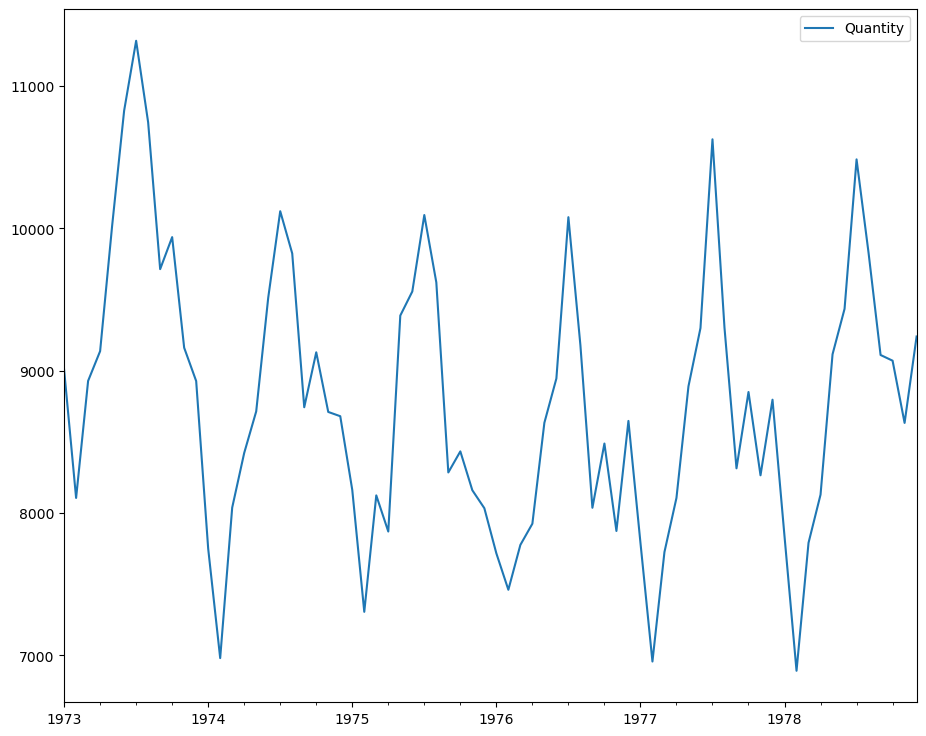

In [250]:
# строим график  вреенного ряда
DataFrame.plot()

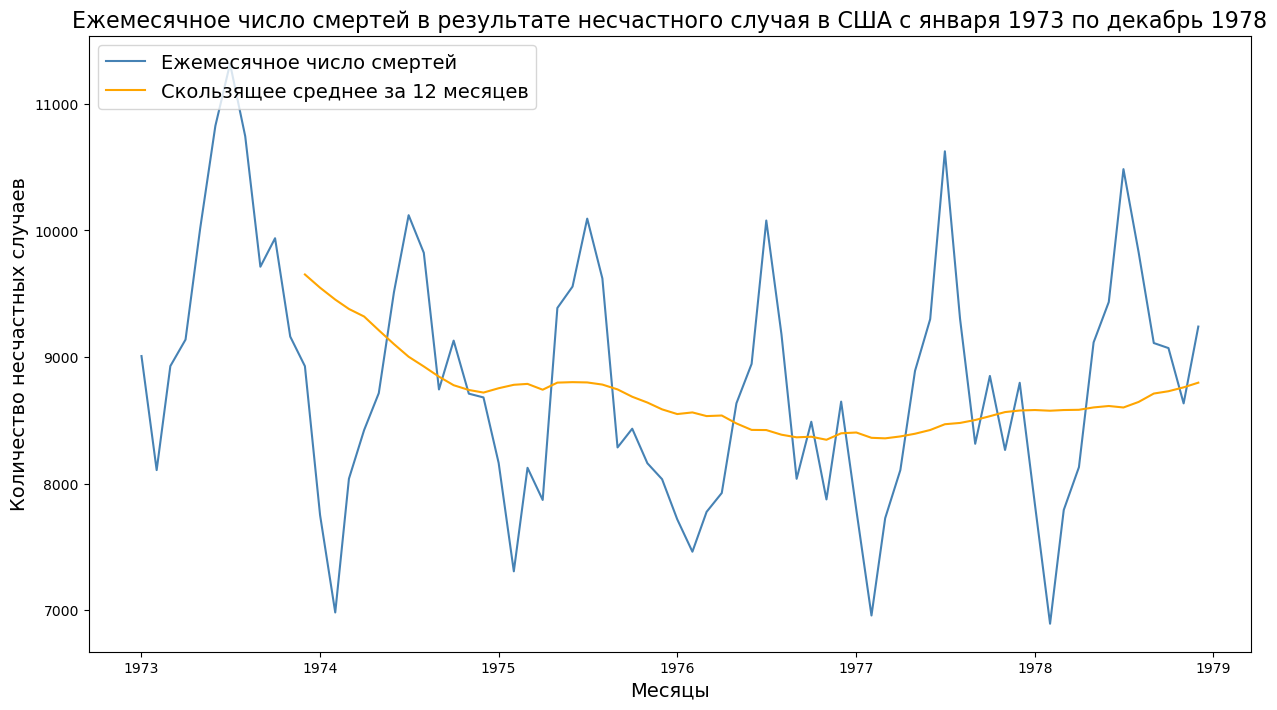

In [251]:
########################################### задаем размер графика
plt.figure(figsize = (15,8))

# поочередно зададим кривые (количество смертей и скользящее среднее) с подписями и цветом
plt.plot(DataFrame, label = 'Ежемесячное число смертей', color = 'steelblue')
plt.plot(DataFrame.rolling(window = 12).mean(), label = 'Скользящее среднее за 12 месяцев', color = 'orange')

# добавим легенду, ее положение на графике и размер шрифта
plt.legend(title = '', loc = 'upper left', fontsize = 14)

# добавим подписи к осям и заголовки
plt.xlabel('Месяцы', fontsize = 14)
plt.ylabel('Количество несчастных случаев', fontsize = 14)
plt.title('Ежемесячное число смертей в результате несчастного случая в США с января 1973 по декабрь 1978', fontsize = 16)

# выведем обе кривые на одном графике
plt.show()



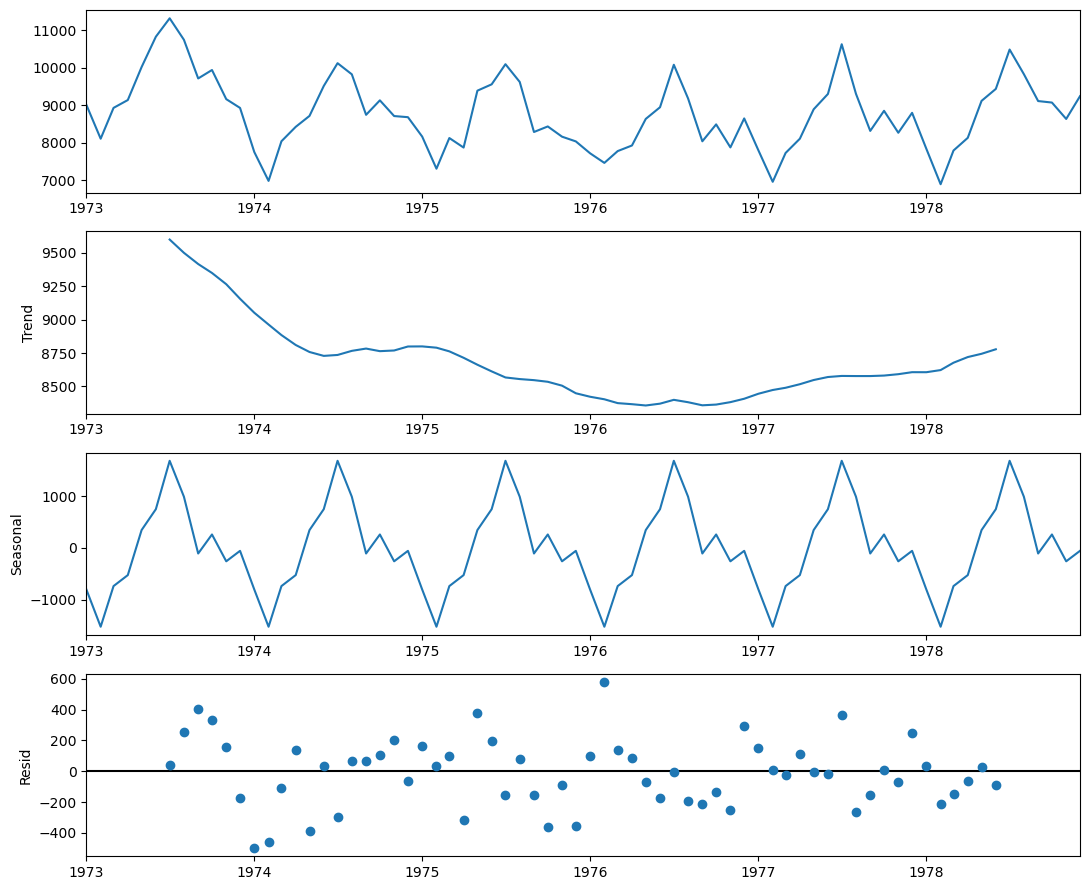

In [252]:
# разложим наш временной ряд на компоненты
#Тренд — долгосрочное изменение уровня ряда
#Сезонность предполагает циклические изменения уровня ряда с постоянным периодом
#Случайные колебания — непрогнозируемое случайное изменение ряда

# импортируем функцию seasonal_decompose из statsmodels 
from statsmodels.tsa.seasonal import seasonal_decompose
 
# задаем размер графика
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9
 
# применяем функцию к данным 
decompose = seasonal_decompose(DataFrame)
decompose.plot()
 
plt.show()

In [253]:
# импортируем необходимую функцию 
from statsmodels.tsa.stattools import adfuller
 
# передадим ей столбец с данными о смертях и поместим результат в adf_test
adf_test = adfuller(DataFrame['Quantity'])
 
# выведем p-value
print('p-value = ' + str(adf_test[1]))

p-value = 0.10248122056865089


Применим этот тест к нашему датасету. 
Использовали пороговое значение, равное 0,05 (5%).
Вероятность (p-value) для данных о перевозках выше 0,05.
Процесс нестанионарный.

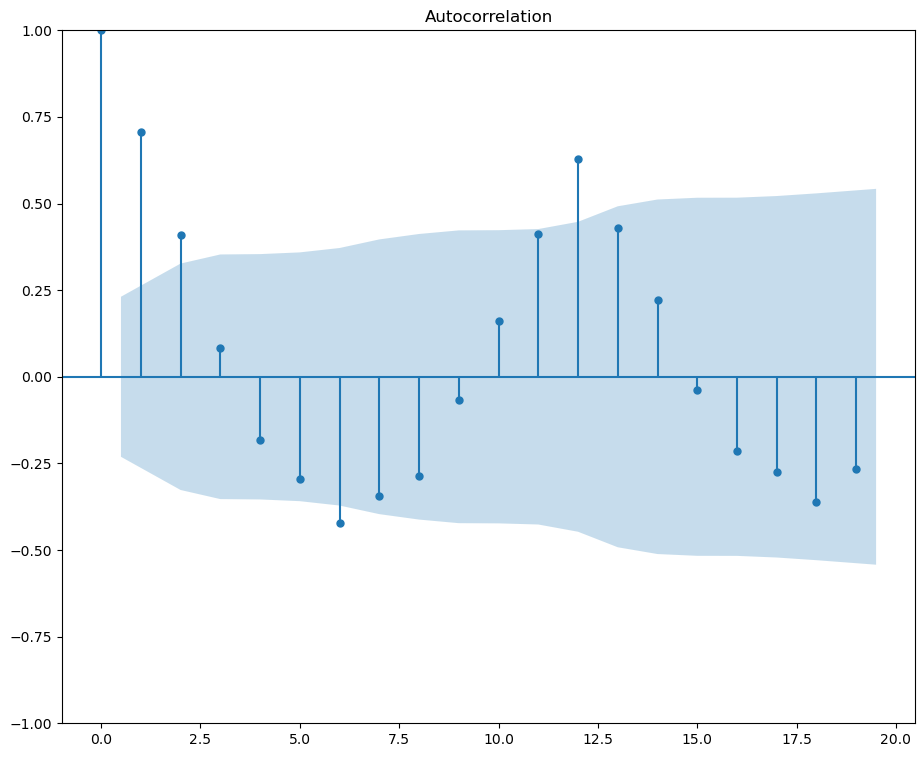

In [254]:
# импортируем автокорреляционную функцию (ACF)
from statsmodels.graphics.tsaplots import plot_acf
 
# применим функцию к нашему набору данных
plot_acf(DataFrame)
plt.show()

In [255]:
# Экспоненциальное сглаживание

alpha = 0.2
# первое значение совпадает со значением временного ряда
exp_smoothing = [DataFrame['Quantity'][0]]

# в цикле for последовательно применяем формулу ко всем элементам ряда
for i in range(1, len(DataFrame['Quantity'])):
  exp_smoothing.append(alpha * DataFrame['Quantity'][i] + (1 - alpha) * exp_smoothing[i - 1])
 
# выведем прогнозное значение для 366-го дня 
exp_smoothing[-1]

9056.668354893221

In [256]:
len(DataFrame), len(exp_smoothing)

(72, 72)

In [257]:
# добавим кривую сглаживаия в качестве столбца в датафрейм
DataFrame['Exp_smoothing'] = exp_smoothing
DataFrame.tail(3)

,Quantity,Exp_smoothing
1978-10-01,9070,9105.294305
1978-11-01,8633,9010.835444
1978-12-01,9240,9056.668355


In [258]:
# для этого импортируем класс timedelta
from datetime import timedelta
 
# возьмём последний индекс 
last_date = DataFrame.iloc[[-1]].index
 
# "прибавим" один день
last_date = last_date + timedelta(days = 1)
last_date
 
# добавим его в датафрейм
DataFrame = DataFrame.append(pd.DataFrame(index = last_date))
 
# значения за этот день останутся пустыми
DataFrame.tail()

,Quantity,Exp_smoothing
1978-09-01,9110.0,9114.117881
1978-10-01,9070.0,9105.294305
1978-11-01,8633.0,9010.835444
1978-12-01,9240.0,9056.668355
1978-12-02,NaN,NaN


In [259]:
# сдвигаем второй столбец
DataFrame['Exp_smoothing'] = DataFrame['Exp_smoothing'].shift(1)

In [260]:
# как и должно быть первое прогнозное значение совпадает с предыдущим фактическим
DataFrame.head()

,Quantity,Exp_smoothing
1973-01-01,9007.0,NaN
1973-02-01,8106.0,9007.000
1973-03-01,8928.0,8826.800
1973-04-01,9137.0,8847.040
1973-05-01,10017.0,8905.032


In [261]:
# и у нас есть прогноз на один день вперед
DataFrame.tail()

,Quantity,Exp_smoothing
1978-09-01,9110.0,9115.147351
1978-10-01,9070.0,9114.117881
1978-11-01,8633.0,9105.294305
1978-12-01,9240.0,9010.835444
1978-12-02,NaN,9056.668355


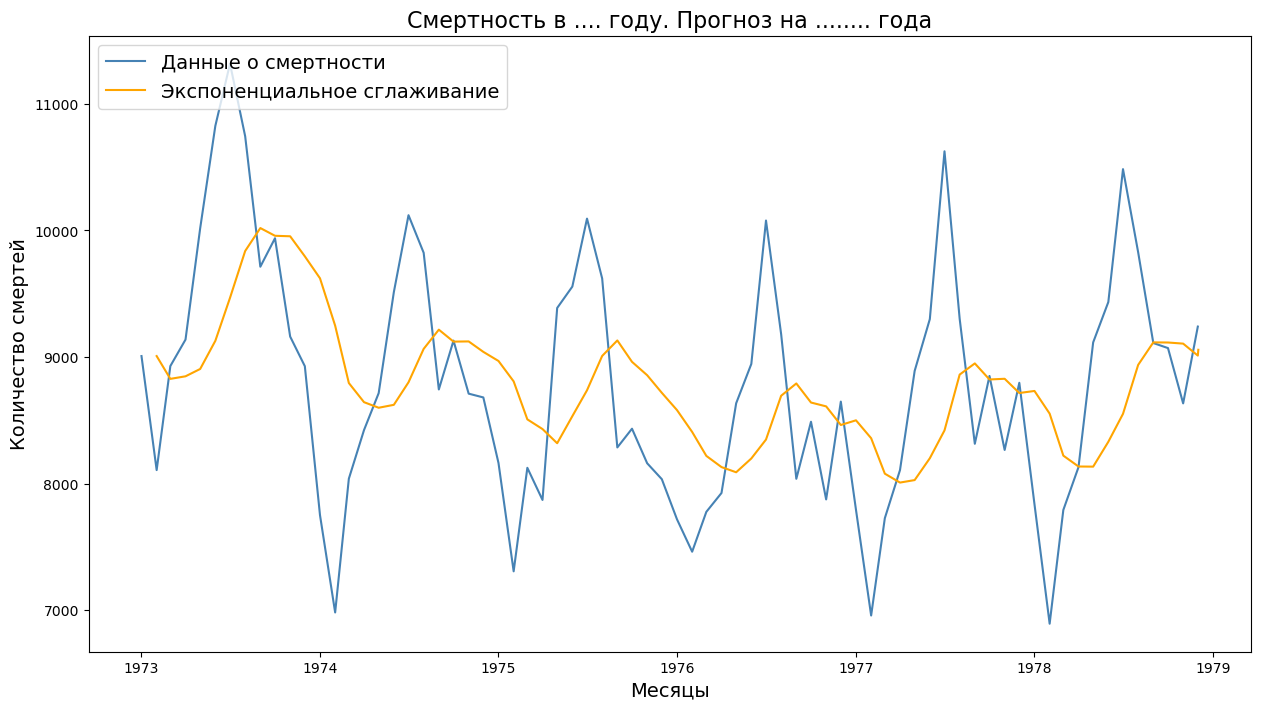

In [262]:
############################################# зададим размер
plt.figure(figsize = (15,8))
 
# выведем данные о смертности и кривую экспоненциального сглаживания
plt.plot(DataFrame['Quantity'], label = 'Данные о смертности', color = 'steelblue')
plt.plot(DataFrame['Exp_smoothing'], label = 'Экспоненциальное сглаживание', color = 'orange')
 
# добавим легенду, ее положение на графике и размер шрифта
plt.legend(title = '', loc = 'upper left', fontsize = 14)
 
# добавим подписи к осям и заголовки
plt.ylabel('Количество смертей', fontsize = 14)
plt.xlabel('Месяцы', fontsize = 14)
plt.title('Смертность в .... году. Прогноз на ........ года', fontsize = 16)
 
plt.show()

In [263]:
# обучающая выборка будет включать данные до декабря 1977 года включительно
train = DataFrame[:'1977-12']
 
# тестовая выборка начнется с января 1978 года
test = DataFrame['1978-01':]

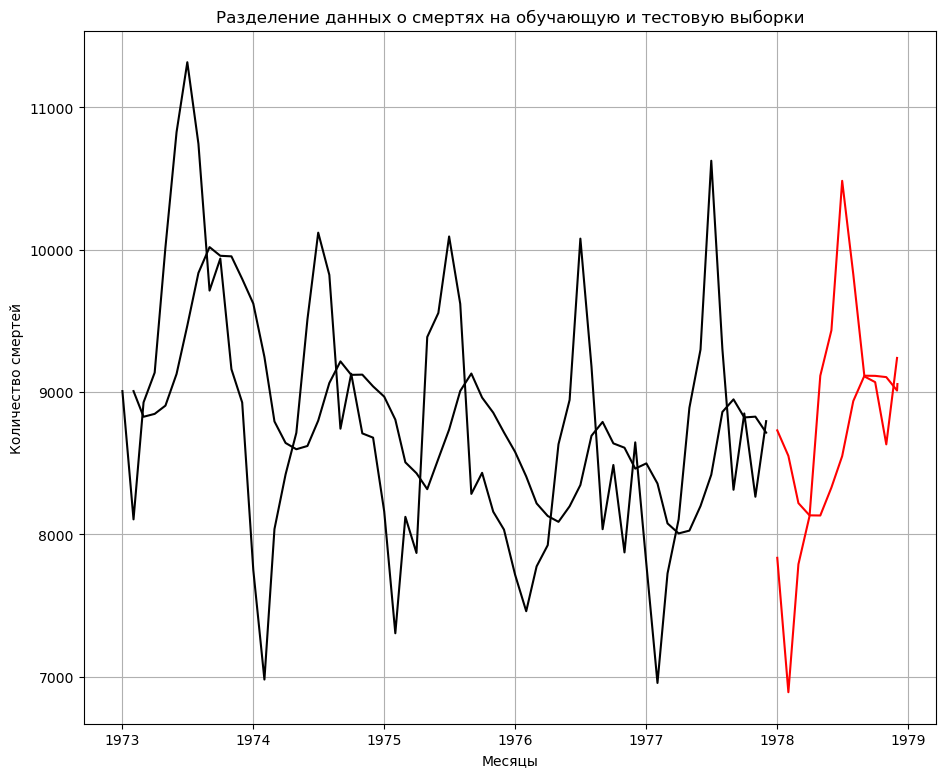

In [264]:
#Посмотрим на разделение на графике.

plt.plot(train, color = "black")
plt.plot(test, color = "red")
 
# заголовок и подписи к осям
plt.title('Разделение данных о смертях на обучающую и тестовую выборки')
plt.ylabel('Количество смертей')
plt.xlabel('Месяцы')
 
# добавим сетку
plt.grid()
 
plt.show()

In [265]:
# обучить модель

# принудительно отключим предупреждения системы
import warnings
warnings.simplefilter(action = 'ignore', category = Warning)
 
# обучим модель с соответствующими параметрами, SARIMAX(3, 0, 0)x(0, 1, 0, 12)
# импортируем класс модели
from statsmodels.tsa.statespace.sarimax import SARIMAX
 
# создадим объект этой модели
model = SARIMAX(train.Quantity, 
                order = (3, 0, 0), 
                seasonal_order = (0, 1, 0, 12))
 
# применим метод fit
result = model.fit()

In [266]:
# Готовы делать прогноз
# тестовый прогнозный период начнется с конца обучающего периода
start = len(train)
 
# и закончится в конце тестового
end = len(train) + len(test) - 1
  
# применим метод predict
DataFrame = result.predict(start, end)
DataFrame

1978-01-01     7804.879281
1978-02-01     6887.719045
1978-03-01     7658.051910
1978-04-01     8065.377954
1978-05-01     8880.776663
1978-06-01     9307.112016
1978-07-01    10637.490966
1978-08-01     9310.805608
1978-09-01     8317.350775
1978-10-01     8849.436255
1978-11-01     8262.962352
1978-12-01     8794.202503
1979-01-01     7803.981792
Freq: MS, Name: predicted_mean, dtype: float64

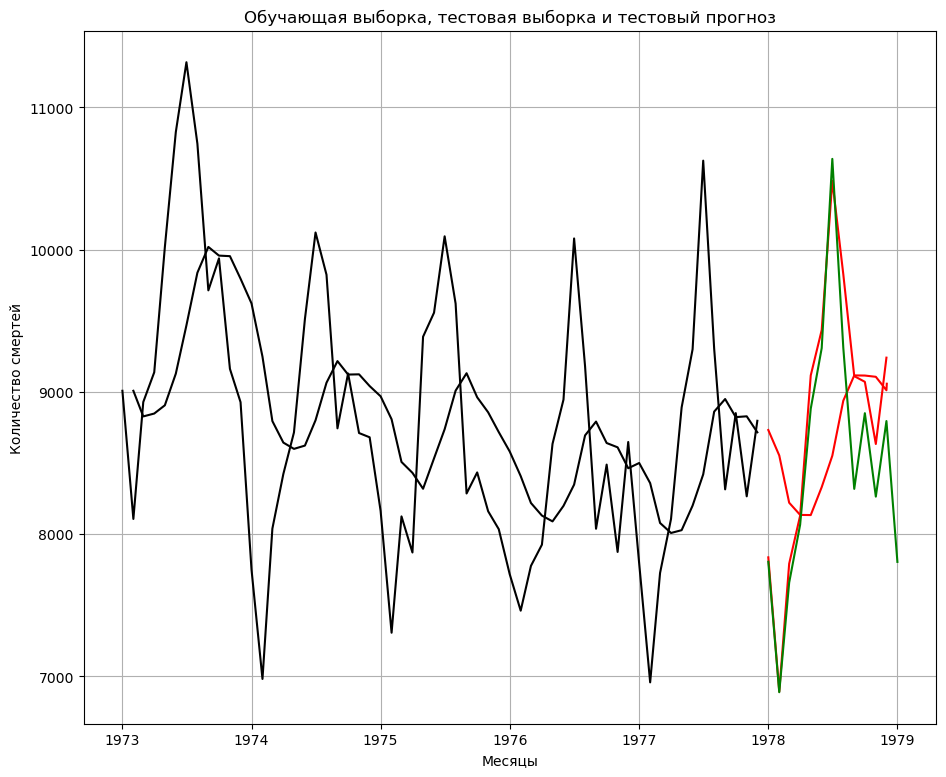

In [267]:
# Построим соответствующий график

# выведем три кривые (обучающая, тестовая выборка и тестовый прогноз)
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.plot(DataFrame, color = "green")
 
# заголовок и подписи к осям
plt.title("Обучающая выборка, тестовая выборка и тестовый прогноз")
plt.ylabel('Количество смертей')
plt.xlabel('Месяцы')
 
# добавим сетку
plt.grid()
 
plt.show()

In [268]:
import numpy as np 
print("The number of nans in test: ", np.isnan(test).sum())

The number of nans in test:  Quantity         1
Exp_smoothing    0
dtype: int64


In [269]:
import numpy as np 
print("The number of nans in train: ", np.isnan(train).sum())

The number of nans in train:  Quantity         0
Exp_smoothing    1
dtype: int64


In [270]:
# также можем использовать знакомые нам метрики среднеквадратической ошибки (MSE) 
# и корня среднеквадратической ошибки (RMSE) для оценки качества.
# импортируем метрику
from sklearn.metrics import mean_squared_error

# рассчитаем MSE
print(mean_squared_error(test, DataFrame))
 
# и RMSE
print(np.sqrt(mean_squared_error(test, DataFrame)))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [271]:
# прогнозный период с конца имеющихся данных
start = len(DataFrame)
 
# и закончится 36 месяцев спустя
end = (len(DataFrame) - 1) + 3 * 12
 
# теперь построим прогноз на три года вперед
forecast = result.predict(start, end)
 
# посмотрим на весь 1976 год
forecast[-12:]

1976-02-01    7164.118027
1976-03-01    8336.729593
1976-04-01    7762.953099
1976-05-01    9386.824326
1976-06-01    9203.326766
1976-07-01    9739.455659
1976-08-01    9758.420099
1976-09-01    8158.265044
1976-10-01    8296.618838
1976-11-01    8276.895055
1976-12-01    7922.822836
1977-01-01    8048.529246
Freq: MS, Name: predicted_mean, dtype: float64

In [272]:
forecast

1974-02-01     6801.561771
1974-03-01     7972.214854
1974-04-01     8884.285526
1974-05-01     9836.589456
1974-06-01    10270.981274
1974-07-01    10720.620543
1974-08-01    10328.374058
1974-09-01     9454.026869
1974-10-01     9629.089643
1974-11-01     8887.891588
1974-12-01     8863.913573
1975-01-01     7769.927116
1975-02-01     7299.467729
1975-03-01     8268.789032
1975-04-01     8389.746557
1975-05-01     8341.731509
1975-06-01     9870.597743
1975-07-01    10253.897673
1975-08-01     9675.942543
1975-09-01     8620.824462
1975-10-01     8877.911609
1975-11-01     8359.984340
1975-12-01     8461.286362
1976-01-01     7936.518236
1976-02-01     7164.118027
1976-03-01     8336.729593
1976-04-01     7762.953099
1976-05-01     9386.824326
1976-06-01     9203.326766
1976-07-01     9739.455659
1976-08-01     9758.420099
1976-09-01     8158.265044
1976-10-01     8296.618838
1976-11-01     8276.895055
1976-12-01     7922.822836
1977-01-01     8048.529246
Freq: MS, Name: predicted_me

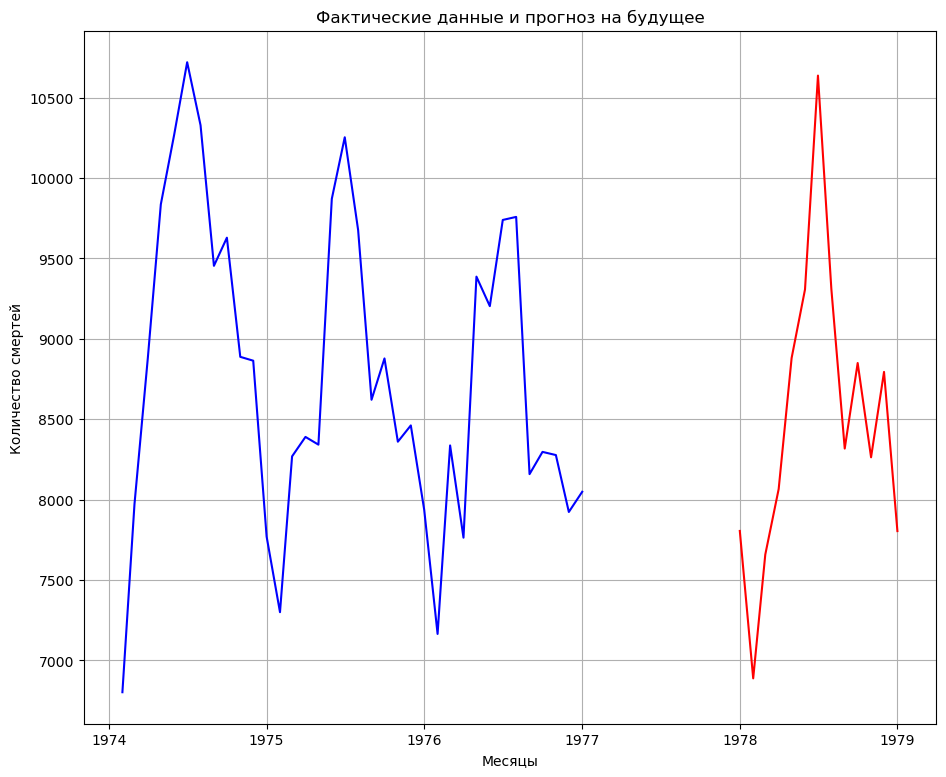

In [273]:
# Посмотрим на прогнозные значения на графике.

# выведем две кривые (фактические данные и прогноз на будущее)
plt.plot(DataFrame, color = 'red')
plt.plot(forecast, color = 'blue')
 
# заголовок и подписи к осям
plt.title('Фактические данные и прогноз на будущее')
plt.ylabel('Количество смертей')
plt.xlabel('Месяцы')
 
# добавим сетку
plt.grid()
 
plt.show()



Где-то что-то пошло не так .....